In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import os
from cellpose import io
from General_HelperFunctions import *
from Extraction_HelperFunctions import *

import pandas as pd

# Importing Data

In [2]:
control_dir = '../control_images/'
drug_dir = '../drug_images/'

control_fnames = [control_dir + fname for fname in os.listdir(control_dir)]
drug_fnames = [drug_dir + fname for fname in os.listdir(drug_dir)]

# Running Feature extraction and saving the cell and nuclei images

In [4]:
ds = Dataset(control_fnames, drug_fnames, bq=0.25)

Instantiating masks...


0it [00:00, ?it/s]

20it [03:45, 11.29s/it]


Retrieving features...


100%|██████████| 20/20 [00:40<00:00,  2.02s/it]


# Feature Filtering (Unsupervised Outlier Detection with **PCA** and **KDE**)

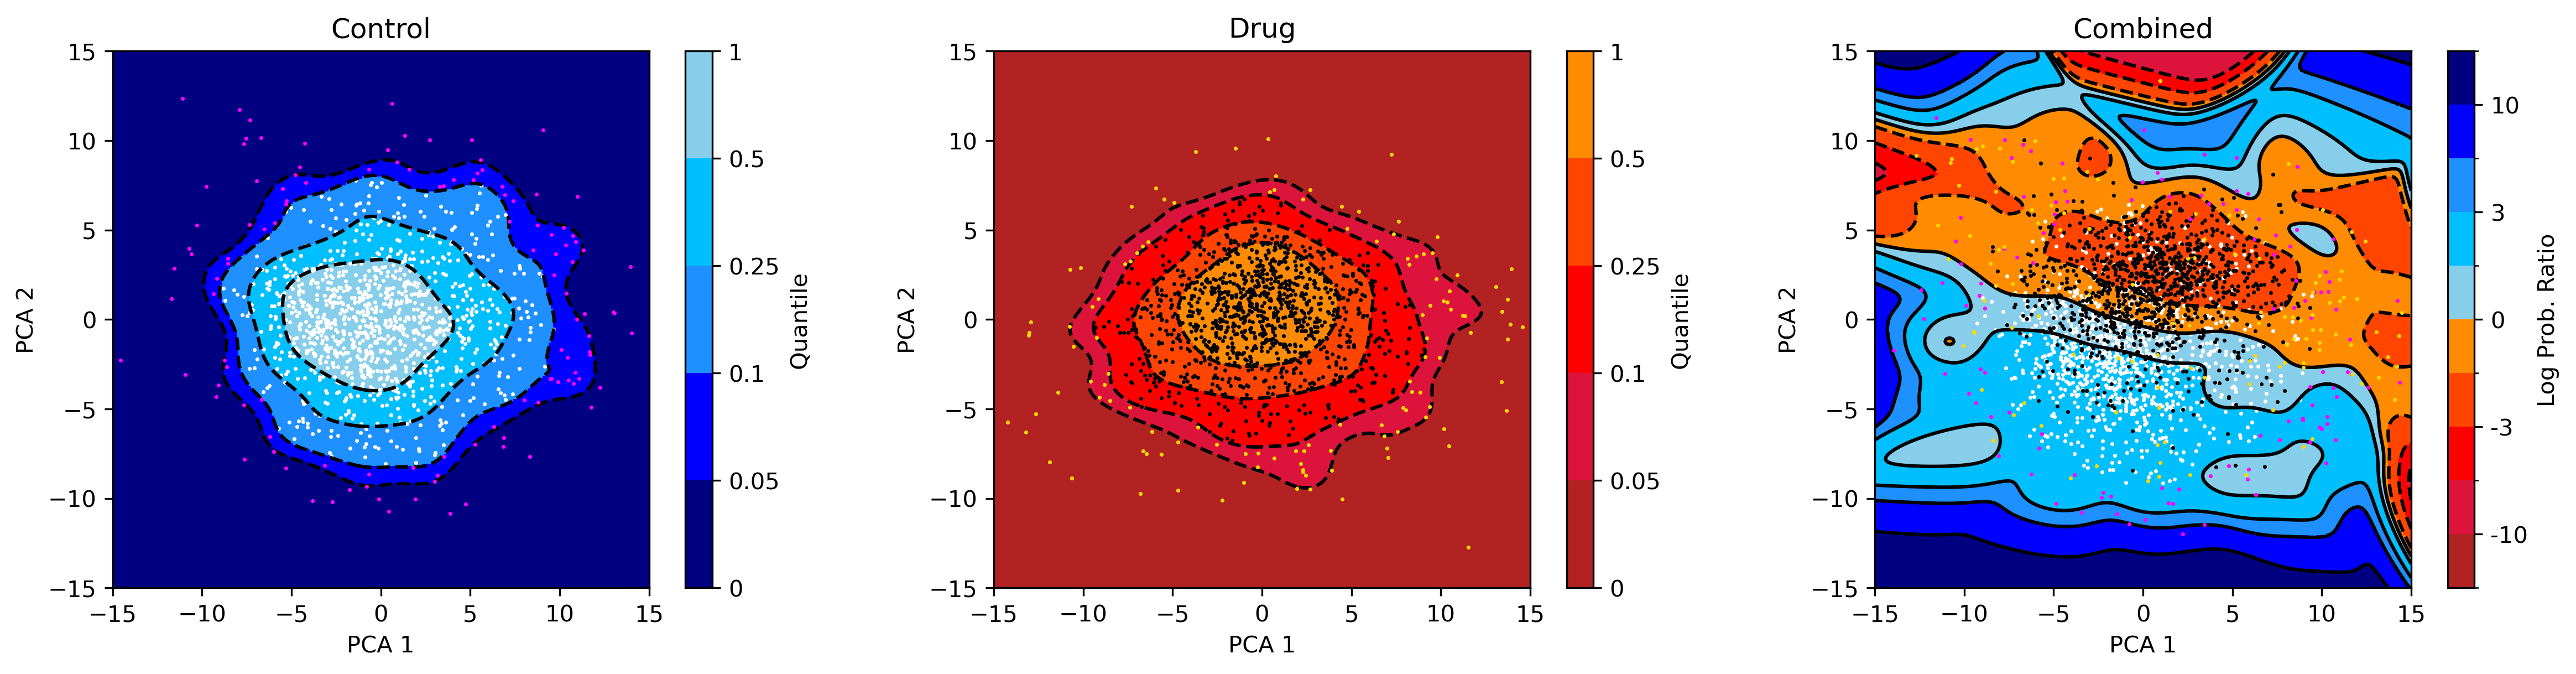

In [8]:
ds.performDimReduction()
ds.makeKDE(show_plot=True, save_to='../figures/cluster_analysis', resolution=256, threshold=0.1)

In [6]:
df_unfiltered = ds.makeSelectionKDE(q_control=-1, q_drug=-1)
df_05 = ds.makeSelectionKDE(q_control=0.05, q_drug=0.05)
df_10 = ds.makeSelectionKDE(q_control=0.1, q_drug=0.1)
df_15 = ds.makeSelectionKDE(q_control=0.15, q_drug=0.15)
df_20 = ds.makeSelectionKDE(q_control=0.20, q_drug=0.20)
df_25 = ds.makeSelectionKDE(q_control=0.25, q_drug=0.25)

# Saving to csv files

In [7]:
df_unfiltered.to_csv('feature_data_25/features_00.csv', index=False)
df_05.to_csv('feature_data_25/features_05.csv', index=False)
df_10.to_csv('feature_data_25/features_10.csv', index=False)
df_15.to_csv('feature_data_25/features_15.csv', index=False)
df_20.to_csv('feature_data_25/features_20.csv', index=False)
df_25.to_csv('feature_data_25/features_25.csv', index=False)